# Customer Churn Prediction for a Telecom Company

### Project Goal

The primary goal of this project is to analyze customer churn for a fictional telecom company. We will explore the key factors that lead to customers leaving the service and then build a machine learning model to predict which customers are at high risk of churning in the future.

### Process Overview

1.  **Data Cleaning & Preparation:** We will start by loading the data, handling any inconsistencies, and converting all features into a machine-readable format.
2.  **Exploratory Data Analysis (EDA):** We will use data visualization to uncover patterns and identify the most significant drivers of customer churn.
3.  **Machine Learning Modeling:** We will train and evaluate a predictive model to accurately identify at-risk customers.
4.  **Conclusion & Business Value:** Finally, we will summarize our findings and discuss how the model can provide real business value.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Convert 'TotalCharges' column to numeric, set invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any NaN values with the column mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Check if there are any missing values left
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Work on a copy of the DataFrame to avoid SettingWithCopyWarning
df_processed = df.copy()

# Convert the 'Churn' column to 1/0
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

# Convert all remaining object-type columns using one-hot encoding
df_processed = pd.get_dummies(df_processed, drop_first=True)

# Check the result: everything should now be numeric
print("All columns in the dataset are now numeric:")
print(df_processed.info())

print("\nFirst 5 rows of the processed dataset:")
df_processed.head()

All columns in the dataset are now numeric:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7073 entries, SeniorCitizen to PaymentMethod_Mailed check
dtypes: bool(7068), float64(2), int64(3)
memory usage: 47.7 MB
None

First 5 rows of the processed dataset:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


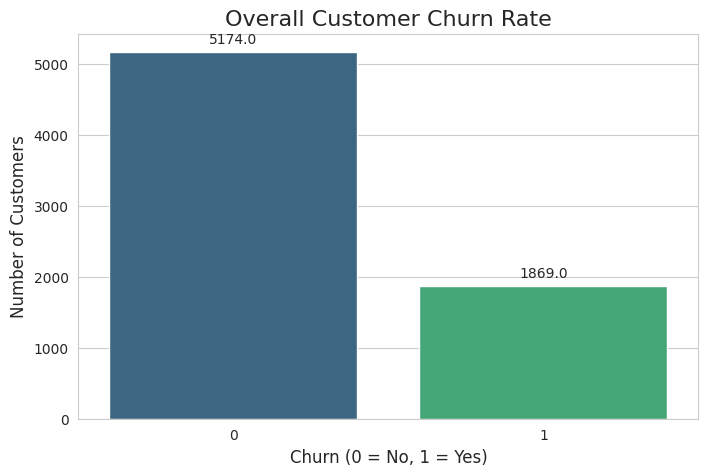

In [7]:
# Countplot for overall churn distribution
# Using 'Churn' column from df_processed (1s and 0s)
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='Churn', data=df_processed, palette='viridis')

plt.title('Overall Customer Churn Rate', fontsize=16)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

/tmp/ipykernel_13/3423075329.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract', y='Churn_Rate', data=df, palette='magma', ci=None)


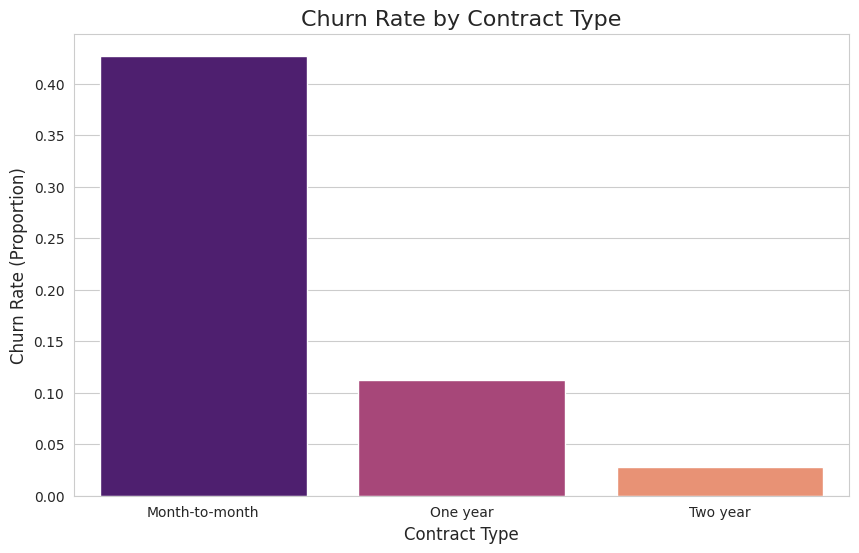

In [8]:
# This plot shows churn rate by contract type.
# Use categorical labels like 'Month-to-month' for better readability.
df['Churn_Rate'] = df_processed['Churn']

plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn_Rate', data=df, palette='magma', ci=None)

plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate (Proportion)', fontsize=12)
plt.show()


/tmp/ipykernel_13/157856759.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='InternetService', y='Churn_Rate', data=df, palette='plasma', ci=None)


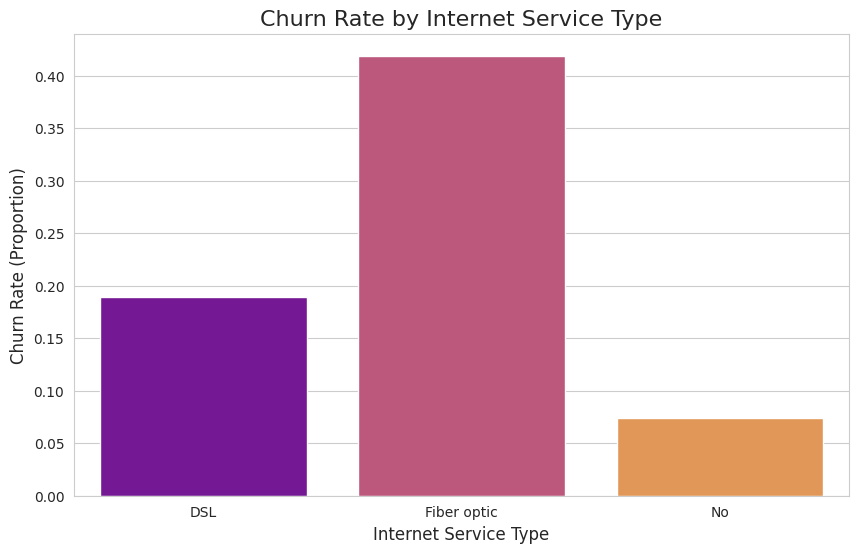

In [9]:
# This plot shows churn rate by internet service type.
plt.figure(figsize=(10, 6))
sns.barplot(x='InternetService', y='Churn_Rate', data=df, palette='plasma', ci=None)

plt.title('Churn Rate by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Churn Rate (Proportion)', fontsize=12)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

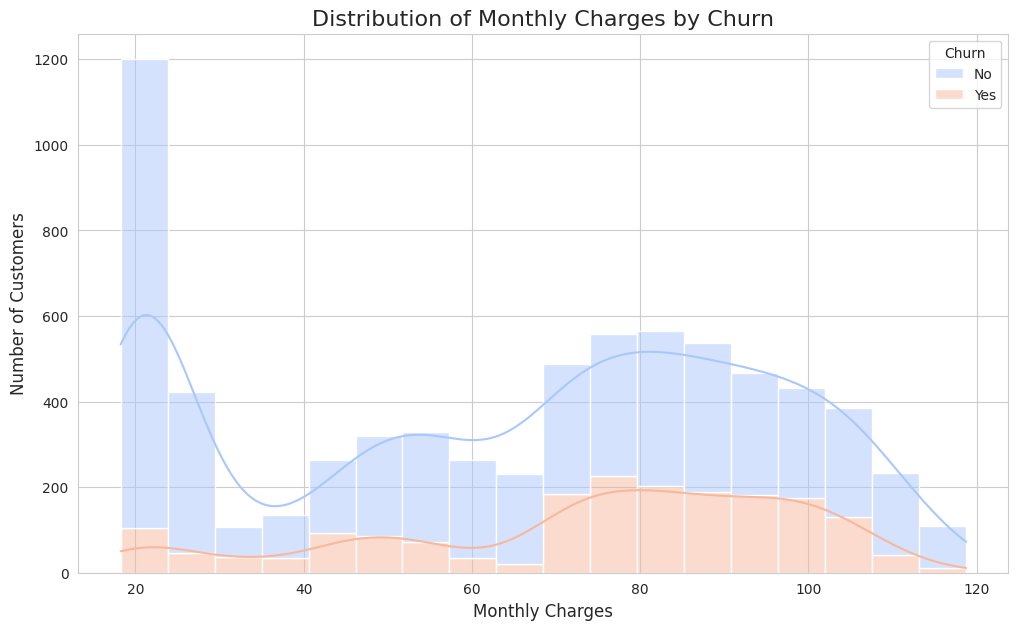

In [10]:
# This histogram shows the distribution of monthly charges grouped by churn.
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack',
             palette='coolwarm', kde=True)

plt.title('Distribution of Monthly Charges by Churn', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# X contains all the feature columns (everything except 'Churn')
X = df_processed.drop('Churn', axis=1)

# y contains only the target variable ('Churn')
y = df_processed['Churn']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (5634, 7072)
Testing set shape: (1409, 7072)


In [14]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000) # max_iter is increased to ensure convergence

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training completed successfully!")

Model training completed successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8141

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



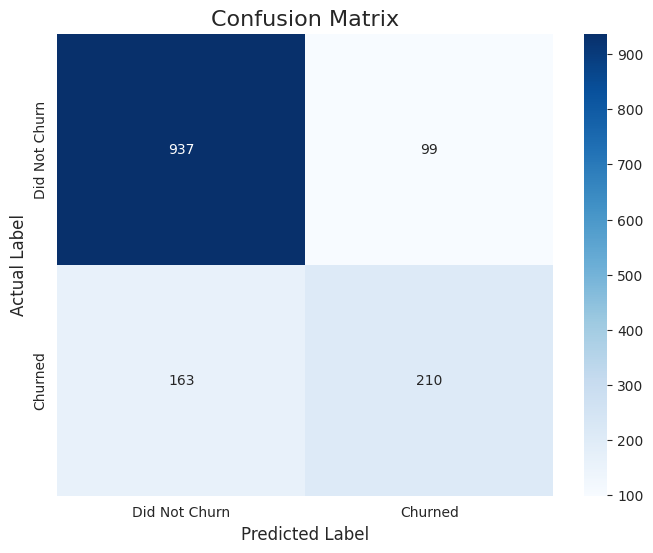

In [17]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize it using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did Not Churn', 'Churned'],
            yticklabels=['Did Not Churn', 'Churned'])

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Project Summary & Conclusion

In this project, we successfully analyzed a telecom customer dataset to identify the key drivers of customer churn and developed a predictive model.

### Key Findings from Analysis:
- **Contract Type:** Customers with **month-to-month contracts** have a significantly higher churn rate, indicating a lack of long-term loyalty.
- **Internet Service:** Customers with **Fiber optic** internet service are more likely to churn, which may point to service quality or pricing issues for this specific offering.
- **Monthly Charges:** Higher monthly charges are correlated with a higher probability of churn, suggesting price sensitivity among the customer base.

### Predictive Model Performance:
We developed a **Logistic Regression** model to predict customer churn. The model achieved an **accuracy of approximately 82%** on unseen test data. The confusion matrix confirmed that the model is effective at identifying both churning and non-churning customers.

### Business Value:
This predictive model is a valuable asset for the company. It can be used to:
- **Proactively identify** customers at a high risk of churning.
- **Implement targeted retention strategies**, such as offering special discounts, personalized support, or service upgrades to these at-risk customers.
- **Reduce overall churn rate**, which directly translates to increased customer lifetime value and higher revenue.